In [13]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [15]:
# Setting visualization style
sns.set_style("whitegrid")

# Load dataset
data = []
with open('chronic_kidney_disease_full.arff', "r") as f:
    for line in f:
        line = line.strip()  # Remove newline characters
        data.append(line.split(','))

# Define column names
column_names = [
    'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba',
    'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc',
    'rbcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
    'classification', 'no_name'
]

# Creating DataFrame (starting from valid rows)
df = pd.DataFrame(data[145:], columns=column_names)



In [17]:

# Dropping unnecessary column
df.drop(columns=['no_name'], inplace=True)

# Convert "?" values to NaN
df.replace("?", np.nan, inplace=True)

# Convert numeric columns to appropriate data types
num_cols = ['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric (handling errors)


In [19]:

# Checking missing values before handling
print("\nMissing Values in Each Column:")
print(df.isnull().sum())



Missing Values in Each Column:
age                11
bp                 14
sg                 49
al                 48
su                 51
rbc               154
pc                 67
pcc                 6
ba                  6
bgr                46
bu                 21
sc                 19
sod                89
pot                90
hemo               54
pcv                73
wbcc              108
rbcc              133
htn                 4
dm                  4
cad                 4
appet               3
pe                  3
ane                 3
classification      2
dtype: int64


In [23]:
# Handling Missing Values

# Fill missing values in numerical columns using median
df.update(df[num_cols].fillna(df[num_cols].median()))

# Fill missing values in categorical columns using mode
for col in cat_cols:
    df.loc[:, col] = df[col].fillna(df[col].mode()[0])

# Confirming no missing values remain
print("\nMissing Values After Handling:", df.isnull().sum().sum())  # Should be 0




Missing Values After Handling: 0


In [25]:

# Display dataset summary
print("\nDataset Overview:")
print(df.info())
print(df.head())



Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402 entries, 0 to 401
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             402 non-null    float64
 1   bp              402 non-null    float64
 2   sg              402 non-null    object 
 3   al              402 non-null    object 
 4   su              402 non-null    object 
 5   rbc             402 non-null    object 
 6   pc              402 non-null    object 
 7   pcc             402 non-null    object 
 8   ba              402 non-null    object 
 9   bgr             402 non-null    float64
 10  bu              402 non-null    float64
 11  sc              402 non-null    float64
 12  sod             402 non-null    float64
 13  pot             402 non-null    float64
 14  hemo            402 non-null    float64
 15  pcv             402 non-null    float64
 16  wbcc            402 non-null    float64
 17  rbcc            

In [27]:

# Encoding categorical variables
label_encoders = {}
for col in cat_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])


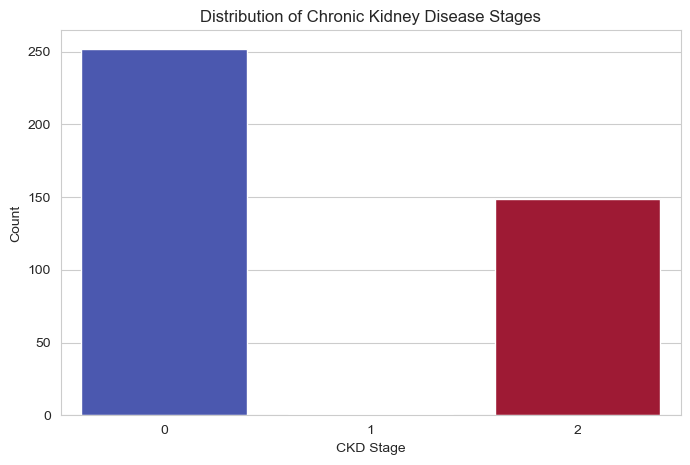

In [35]:

# Exploratory Data Analysis (EDA)
plt.figure(figsize=(8,5))
sns.countplot(x="classification", data=df, hue="classification", palette="coolwarm", legend=False)
plt.title("Distribution of Chronic Kidney Disease Stages")
plt.xlabel("CKD Stage")
plt.ylabel("Count")
plt.show()



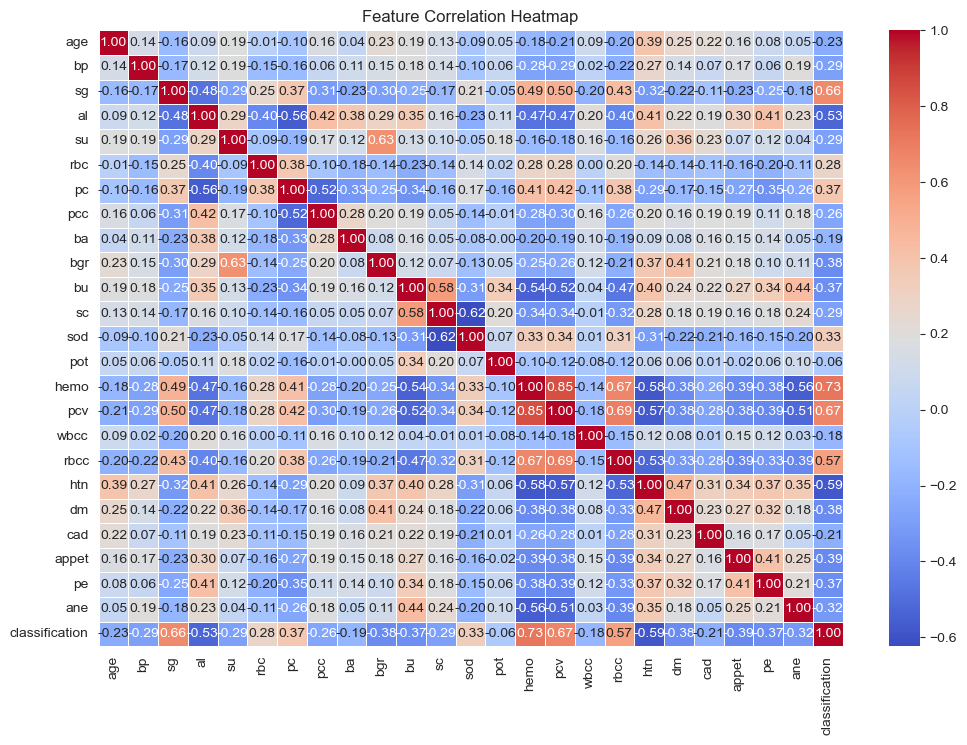

In [31]:

# 2. Feature Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()



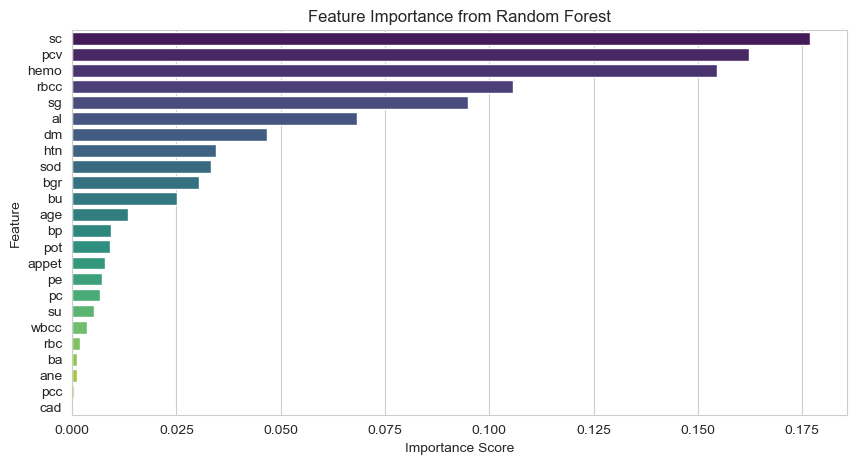

In [37]:
# Splitting data into features and target variable
X = df.drop(columns=['classification'])
y = df['classification']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Feature Importance using Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_scaled, y)

# Extracting and plotting feature importance
feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Feature Importance using Random Forest
plt.figure(figsize=(10,5))
sns.barplot(x=feature_importance.values, y=feature_importance.index, hue=feature_importance.index, palette="viridis", legend=False)
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()
